In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zhixuanhe","key":"47a32b69bad1e000b1140667492e2e7b"}'}

In [ ]:
!mkdir -p ~/.kaggle 

!cp kaggle.json ~/.kaggle/ 

!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
!kaggle competitions download -c titanic -p '../content/gdrive/My Drive/kaggle/Titanic'

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [ ]:
data=pd.read_csv('../content/gdrive/My Drive/kaggle/Titanic/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1=data['Survived']

In [ ]:
df=data.copy()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
((df.isnull().sum())/len(df))*100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
df=df.drop(['Name','Ticket','Cabin','PassengerId','Survived'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Age']=df['Age'].fillna(30.0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [ ]:
df_num1 = df.select_dtypes('float64')
df_num2 = df.select_dtypes('int64')
df_obj = df.select_dtypes('object') 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median') 
df_num1 = pd.DataFrame(imputer.fit_transform(df_num1), columns = df_num1.columns)
obj_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_obj = pd.DataFrame(obj_imputer.fit_transform(df_obj), columns = df_obj.columns)

In [ ]:
df_new = pd.concat([df_obj, df_num1, df_num2], axis = 1, join = 'inner') 
df_new

,Sex,Embarked,Age,Fare,Pclass,SibSp,Parch
0,male,S,22.0,7.2500,3,1,0
1,female,C,38.0,71.2833,1,1,0
2,female,S,26.0,7.9250,3,0,0
3,female,S,35.0,53.1000,1,1,0
4,male,S,35.0,8.0500,3,0,0
...,...,...,...,...,...,...,...
886,male,S,27.0,13.0000,2,0,0
887,female,S,19.0,30.0000,1,0,0
888,female,S,30.0,23.4500,3,1,2
889,male,C,26.0,30.0000,1,0,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Embarked  891 non-null    object 
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Pclass    891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [ ]:
df_new['Pclass']=df_new['Pclass'].astype('float64')
df_new['SibSp']=df_new['SibSp'].astype('float64')
df_new['Parch']=df_new['Parch'].astype('float64')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Embarked  891 non-null    object 
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Pclass    891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    float64
dtypes: float64(5), object(2)
memory usage: 48.9+ KB


In [ ]:
df_num = df_new.select_dtypes('float64')
df_obj = df_new.select_dtypes('object')

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data_std = scaler.fit_transform(df_num) 
data_std

array([[-0.59705478, -0.50244517,  0.82737724,  0.43279337, -0.47367361],
       [ 0.63416229,  0.78684529, -1.56610693,  0.43279337, -0.47367361],
       [-0.28925051, -0.48885426,  0.82737724, -0.4745452 , -0.47367361],
       ...,
       [ 0.01855376, -0.17626324,  0.82737724,  0.43279337,  2.00893337],
       [-0.28925051, -0.04438104, -1.56610693, -0.4745452 , -0.47367361],
       [ 0.17245589, -0.49237783,  0.82737724, -0.4745452 , -0.47367361]])

In [ ]:
cov_matrix = np.cov(data_std.T) 
cov_matrix

array([[ 1.0011236 ,  0.09073371, -0.33009759, -0.2327007 , -0.18053234],
       [ 0.09073371,  1.0011236 , -0.55011704,  0.15983043,  0.21646789],
       [-0.33009759, -0.55011704,  1.0011236 ,  0.08317471,  0.01846339],
       [-0.2327007 ,  0.15983043,  0.08317471,  1.0011236 ,  0.41530381],
       [-0.18053234,  0.21646789,  0.01846339,  0.41530381,  1.0011236 ]])

In [ ]:
eig_vals, eig_vec = np.linalg.eig(cov_matrix)

print(eig_vals)  
print('')
print(eig_vec)

[1.69070759 1.63239425 0.37584838 0.72579778 0.58086997]

[[-0.45150143 -0.32130564 -0.2018384  -0.80452085 -0.07011847]
 [-0.56201835  0.36848819 -0.66019235  0.33510737 -0.01417516]
 [ 0.68059616 -0.05435673 -0.70531906 -0.186681    0.03885161]
 [ 0.1256843   0.61198573  0.10831258 -0.27927427 -0.72107641]
 [ 0.03569538  0.61927211  0.1191668  -0.35721889  0.68805656]]


In [ ]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse = True)]
var_exp

[33.77620100469117,
 32.61124323983752,
 14.499663844670252,
 11.604360796890214,
 7.508531113910859]

In [ ]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 33.776201  ,  66.38744424,  80.88710809,  92.49146889,
       100.        ])

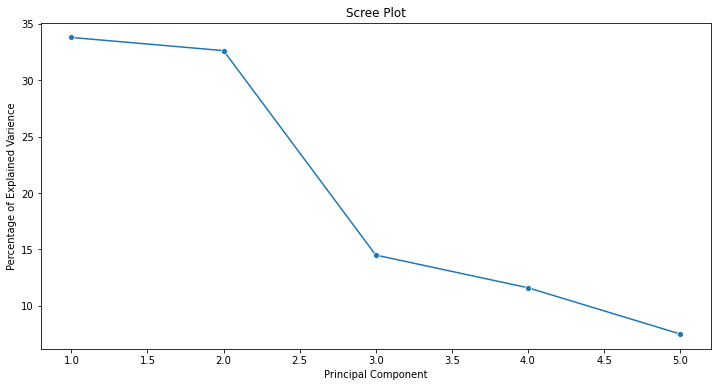

In [ ]:
per_var = np.round(cum_var_exp, decimals = 1) 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize = (12, 6))
sns.lineplot(y = var_exp, x = range(1, len(var_exp)+1), marker = 'o')
plt.ylabel('Percentage of Explained Varience')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5, random_state = 123)
df_pca = pca.fit_transform(data_std)
df_pca

array([[-1.15255164, -0.06675106,  0.20585145, -0.55685957,  0.1409151 ],
       [ 1.75694566,  0.14284224,  0.09418038, -0.75445724, -0.44756831],
       [-0.89190102, -0.71592047,  0.21616722,  0.07562544,  0.31029062],
       ...,
       [-0.77990087,  1.3930539 , -1.06694661,  1.10352522,  0.18466703],
       [ 0.98689722, -0.42203536,  0.81193148, -0.02366575, -1.08444156],
       [-0.68542023, -0.86556773, -0.15646598,  0.04330124,  0.40115446]])

In [ ]:
df_pca.transpose()

array([[-1.15255164,  1.75694566, -0.89190102, ..., -0.77990087,
         0.98689722, -0.68542023],
       [-0.06675106,  0.14284224, -0.71592047, ...,  1.3930539 ,
        -0.42203536, -0.86556773],
       [ 0.20585145,  0.09418038,  0.21616722, ..., -1.06694661,
         0.81193148, -0.15646598],
       [-0.55685957, -0.75445724,  0.07562544, ...,  1.10352522,
        -0.02366575,  0.04330124],
       [ 0.1409151 , -0.44756831,  0.31029062, ...,  0.18466703,
        -1.08444156,  0.40115446]])

In [ ]:
pca.explained_variance_ratio_

array([0.33776201, 0.32611243, 0.14499664, 0.11604361, 0.07508531])

In [ ]:
data_std = pd.DataFrame(data_std, columns = list(df_num))
data_std

,Age,Fare,Pclass,SibSp,Parch
0,-0.597055,-0.502445,0.827377,0.432793,-0.473674
1,0.634162,0.786845,-1.566107,0.432793,-0.473674
2,-0.289251,-0.488854,0.827377,-0.474545,-0.473674
3,0.403309,0.420730,-1.566107,0.432793,-0.473674
4,0.403309,-0.486337,0.827377,-0.474545,-0.473674
...,...,...,...,...,...
886,-0.212299,-0.386671,-0.369365,-0.474545,-0.473674
887,-0.827908,-0.044381,-1.566107,-0.474545,-0.473674
888,0.018554,-0.176263,0.827377,0.432793,2.008933
889,-0.289251,-0.044381,-1.566107,-0.474545,-0.473674


In [ ]:
comp = pca.components_
data_loading = pd.DataFrame(comp, columns = list(data_std))
data_loading

,Age,Fare,Pclass,SibSp,Parch
0,0.451501,0.562018,-0.680596,-0.125684,-0.035695
1,-0.321306,0.368488,-0.054357,0.611986,0.619272
2,-0.804521,0.335107,-0.186681,-0.279274,-0.357219
3,-0.070118,-0.014175,0.038852,-0.721076,0.688057
4,0.201838,0.660192,0.705319,-0.108313,-0.119167


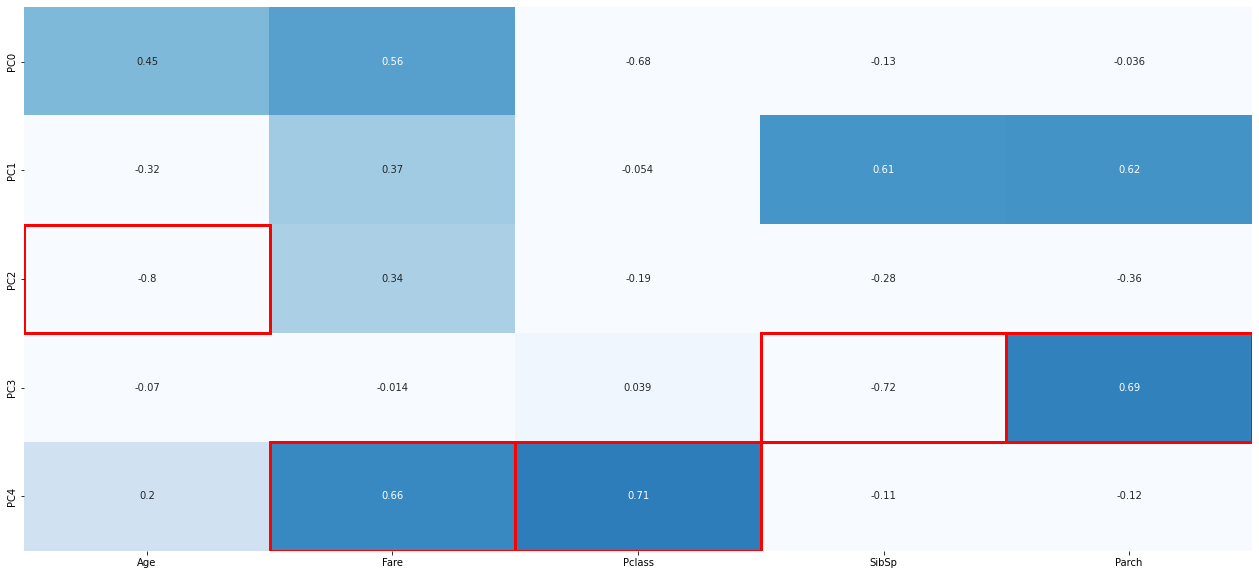

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (22, 10), facecolor='w', edgecolor = 'k')
ax = sns.heatmap(data_loading, annot = True, fmt = '.2g', cbar = False, ax = ax, vmax = 1.0, vmin = 0.0, cmap = 'Blues', yticklabels = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4'])

columns_max = data_loading.abs().idxmax(axis = 0)

for col, variable in enumerate(data_loading.columns):
    position = data_loading.index.get_loc(columns_max[variable])
    ax.add_patch(Rectangle((col, position), 1,1, fill = False, edgecolor = 'red', lw=3))

In [ ]:
df_pca = pd.DataFrame(df_pca, columns = ['Pclass', 'Parch', 'Age', 'SibSp', 'Fare'])
df_pca

,Pclass,Parch,Age,SibSp,Fare
0,-1.152552,-0.066751,0.205851,-0.556860,0.140915
1,1.756946,0.142842,0.094180,-0.754457,-0.447568
2,-0.891901,-0.715920,0.216167,0.075625,0.310291
3,1.446952,0.082108,0.157219,-0.733080,-0.735870
4,-0.577795,-0.937516,-0.340168,0.027029,0.451737
...,...,...,...,...,...
886,0.014770,-0.637941,0.411910,0.022286,-0.450802
887,0.743693,-0.248962,1.245293,0.014104,-1.193163
888,-0.779901,1.393054,-1.066947,1.103525,0.184667
889,0.986897,-0.422035,0.811931,-0.023666,-1.084442


In [ ]:
df_obj

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [ ]:
df_obj['Sex'] = df_new['Sex'].astype('category')
df_obj['Embarked'] = df_new['Embarked'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Sex       891 non-null    category
 1   Embarked  891 non-null    category
dtypes: category(2)
memory usage: 2.1 KB


In [ ]:
df_obj

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [ ]:
df_obj['Sex']=df_obj['Sex'].cat.codes
df_obj['Embarked']=df_obj['Embarked'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_obj

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [ ]:
df_ml=pd.concat([df_pca,df_obj,df1], axis=1, join='inner')

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Parch     891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Fare      891 non-null    float64
 5   Sex       891 non-null    int8   
 6   Embarked  891 non-null    int8   
 7   Survived  891 non-null    int64  
dtypes: float64(5), int64(1), int8(2)
memory usage: 43.6 KB


In [ ]:
df_ml

,Pclass,Parch,Age,SibSp,Fare,Sex,Embarked,Survived
0,-1.152552,-0.066751,0.205851,-0.556860,0.140915,1,2,0
1,1.756946,0.142842,0.094180,-0.754457,-0.447568,0,0,1
2,-0.891901,-0.715920,0.216167,0.075625,0.310291,0,2,1
3,1.446952,0.082108,0.157219,-0.733080,-0.735870,0,2,1
4,-0.577795,-0.937516,-0.340168,0.027029,0.451737,1,2,0
...,...,...,...,...,...,...,...,...
886,0.014770,-0.637941,0.411910,0.022286,-0.450802,1,2,0
887,0.743693,-0.248962,1.245293,0.014104,-1.193163,0,2,1
888,-0.779901,1.393054,-1.066947,1.103525,0.184667,0,2,0
889,0.986897,-0.422035,0.811931,-0.023666,-1.084442,1,0,1


In [ ]:
x=df_ml.drop('Survived',axis=1)
y=df_ml.pop('Survived')

In [ ]:
test=pd.read_csv('../content/gdrive/My Drive/kaggle/Titanic/test.csv')

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df2=test.copy()
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df2=df2.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
df2['Age']=df2['Age'].fillna(30)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
df2_num1 = df2.select_dtypes('float64')
df2_num2 = df2.select_dtypes('int64')
df2_obj = df2.select_dtypes('object') 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median') 
df2_num1 = pd.DataFrame(imputer.fit_transform(df2_num1), columns = df2_num1.columns)
obj_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df2_obj = pd.DataFrame(obj_imputer.fit_transform(df2_obj), columns = df2_obj.columns)

In [ ]:
df2_new = pd.concat([df2_obj, df2_num1, df2_num2], axis = 1, join = 'inner') 
df2_new

,Sex,Embarked,Age,Fare,Pclass,SibSp,Parch
0,male,Q,34.5,7.8292,3,0,0
1,female,S,47.0,7.0000,3,1,0
2,male,Q,62.0,9.6875,2,0,0
3,male,S,27.0,8.6625,3,0,0
4,female,S,22.0,12.2875,3,1,1
...,...,...,...,...,...,...,...
413,male,S,30.0,8.0500,3,0,0
414,female,C,39.0,108.9000,1,0,0
415,male,S,38.5,7.2500,3,0,0
416,male,S,30.0,8.0500,3,0,0


In [ ]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Embarked  418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Pclass    418 non-null    int64  
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
df2_new['Pclass']=df2_new['Pclass'].astype('float64')
df2_new['SibSp']=df2_new['SibSp'].astype('float64')
df2_new['Parch']=df2_new['Parch'].astype('float64')

In [ ]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Embarked  418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Pclass    418 non-null    float64
 5   SibSp     418 non-null    float64
 6   Parch     418 non-null    float64
dtypes: float64(5), object(2)
memory usage: 23.0+ KB


In [ ]:
df2_num = df2_new.select_dtypes('float64')
df2_obj = df2_new.select_dtypes('object')

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data_std1 = scaler.fit_transform(df2_num) 
data_std1

array([[ 0.33942386, -0.49741333,  0.87348191, -0.49947002, -0.4002477 ],
       [ 1.32992353, -0.51227801,  0.87348191,  0.61699237, -0.4002477 ],
       [ 2.51852314, -0.46410047, -0.31581919, -0.49947002, -0.4002477 ],
       ...,
       [ 0.65638375, -0.50779638,  0.87348191, -0.49947002, -0.4002477 ],
       [-0.01715602, -0.49345515,  0.87348191, -0.49947002, -0.4002477 ],
       [-0.01715602, -0.23695704,  0.87348191,  0.61699237,  0.61989583]])

In [ ]:
cov_matrix1 = np.cov(data_std1.T) 
cov_matrix1

array([[ 1.00239808,  0.32697618, -0.44429667, -0.07905873, -0.04508741],
       [ 0.32697618,  1.00239808, -0.57869754,  0.17232412,  0.23087759],
       [-0.44429667, -0.57869754,  1.00239808,  0.00108933,  0.01876552],
       [-0.07905873,  0.17232412,  0.00108933,  1.00239808,  0.30763057],
       [-0.04508741,  0.23087759,  0.01876552,  0.30763057,  1.00239808]])

In [ ]:
eig_vals1, eig_vec1 = np.linalg.eig(cov_matrix1)

print(eig_vals1)  
print('')
print(eig_vec1)

[1.93346268 1.38507691 0.36472238 0.62925457 0.69947386]

[[-0.48217451 -0.3112497  -0.11935958 -0.80601126  0.08203963]
 [-0.60470786  0.13750838 -0.6681864   0.41022261  0.02577197]
 [ 0.60268558  0.18725582 -0.69630011 -0.31661352  0.12894724]
 [-0.12133592  0.65102332  0.05791531 -0.25872321 -0.70082406]
 [-0.15454397  0.65216483  0.22603584 -0.12198948  0.69629272]]


In [ ]:
total1 = sum(eig_vals1)
var_exp1 = [(i/total)*100 for i in sorted(eig_vals1, reverse = True)]
var_exp1

[38.625853739334644,
 27.670447871677478,
 13.973776390551912,
 12.570966732456862,
 7.286260828935931]

In [ ]:
cum_var_exp1 = np.cumsum(var_exp1)
cum_var_exp1

array([ 38.62585374,  66.29630161,  80.270078  ,  92.84104473,
       100.12730556])

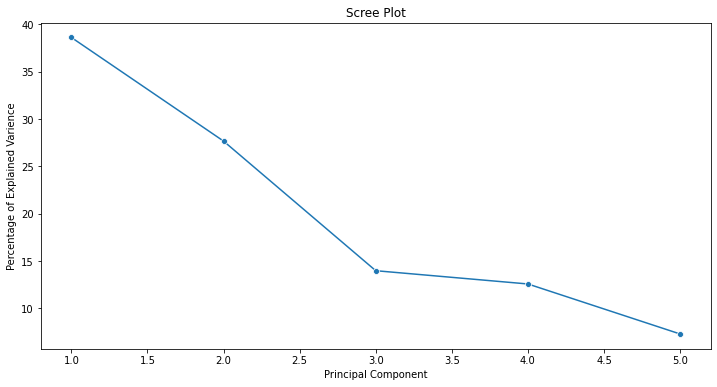

In [ ]:
per_var1 = np.round(cum_var_exp1, decimals = 1) 
labels = ['PC' + str(x) for x in range(1, len(per_var1)+1)]

plt.figure(figsize = (12, 6))
sns.lineplot(y = var_exp1, x = range(1, len(var_exp1)+1), marker = 'o')
plt.ylabel('Percentage of Explained Varience')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5, random_state = 123)
df2_pca = pca.fit_transform(data_std1)
df2_pca

array([[-0.78602269, -0.59667361,  0.19901101, -0.57613534,  0.43575149],
       [-0.1819508 , -0.18016731, -0.50255556, -1.66944179,  0.47938448],
       [ 1.0016026 , -1.49304036,  0.22528495, -1.9422994 , -0.11000341],
       ...,
       [-0.63947142, -0.69675504,  0.22474669, -0.83586794,  0.46664589],
       [-0.95556288, -0.48514394,  0.16985934, -0.2871042 ,  0.39583507],
       [-0.50733243,  0.94227148,  0.10434462, -0.59518439,  0.27197435]])

In [ ]:
df2_pca.transpose()

array([[-0.78602269, -0.1819508 ,  1.0016026 , ..., -0.63947142,
        -0.95556288, -0.50733243],
       [-0.59667361, -0.18016731, -1.49304036, ..., -0.69675504,
        -0.48514394,  0.94227148],
       [ 0.19901101, -0.50255556,  0.22528495, ...,  0.22474669,
         0.16985934,  0.10434462],
       [-0.57613534, -1.66944179, -1.9422994 , ..., -0.83586794,
        -0.2871042 , -0.59518439],
       [ 0.43575149,  0.47938448, -0.11000341, ...,  0.46664589,
         0.39583507,  0.27197435]])

In [ ]:
pca.explained_variance_ratio_

array([0.38576743, 0.27635267, 0.1395601 , 0.12554984, 0.07276997])

In [ ]:
data_std1 = pd.DataFrame(data_std1, columns = list(df2_num))
data_std1

,Age,Fare,Pclass,SibSp,Parch
0,0.339424,-0.497413,0.873482,-0.499470,-0.400248
1,1.329924,-0.512278,0.873482,0.616992,-0.400248
2,2.518523,-0.464100,-0.315819,-0.499470,-0.400248
3,-0.254876,-0.482475,0.873482,-0.499470,-0.400248
4,-0.651076,-0.417492,0.873482,0.616992,0.619896
...,...,...,...,...,...
413,-0.017156,-0.493455,0.873482,-0.499470,-0.400248
414,0.696004,1.314435,-1.505120,-0.499470,-0.400248
415,0.656384,-0.507796,0.873482,-0.499470,-0.400248
416,-0.017156,-0.493455,0.873482,-0.499470,-0.400248


In [ ]:
comp1 = pca.components_
data_loading1 = pd.DataFrame(comp1, columns = list(data_std1))
data_loading1

,Age,Fare,Pclass,SibSp,Parch
0,0.482175,0.604708,-0.602686,0.121336,0.154544
1,-0.311250,0.137508,0.187256,0.651023,0.652165
2,0.082040,0.025772,0.128947,-0.700824,0.696293
3,-0.806011,0.410223,-0.316614,-0.258723,-0.121989
4,0.119360,0.668186,0.696300,-0.057915,-0.226036


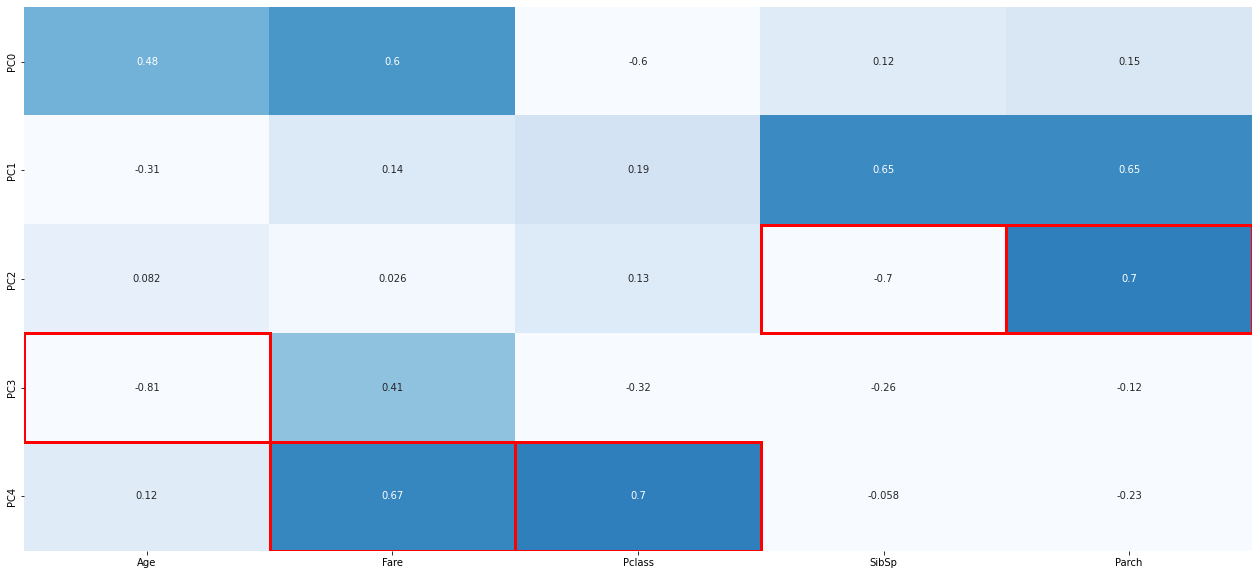

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (22, 10), facecolor='w', edgecolor = 'k')
ax = sns.heatmap(data_loading1, annot = True, fmt = '.2g', cbar = False, ax = ax, vmax = 1.0, vmin = 0.0, cmap = 'Blues', yticklabels = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4'])

columns_max = data_loading1.abs().idxmax(axis = 0)

for col, variable in enumerate(data_loading1.columns):
    position = data_loading1.index.get_loc(columns_max[variable])
    ax.add_patch(Rectangle((col, position), 1,1, fill = False, edgecolor = 'red', lw=3))

In [ ]:
df2_pca = pd.DataFrame(df2_pca, columns = ['Pclass', 'Parch', 'Age', 'SibSp', 'Fare'])
df2_pca

,Pclass,Parch,Age,SibSp,Fare
0,-0.786023,-0.596674,0.199011,-0.576135,0.435751
1,-0.181951,-0.180167,-0.502556,-1.669442,0.479384
2,1.001603,-1.493040,0.225285,-1.942299,-0.110003
3,-1.063546,-0.409644,0.150640,-0.090995,0.374798
4,-0.922163,1.114754,0.047685,-0.158297,0.075679
...,...,...,...,...,...
413,-0.955563,-0.485144,0.169859,-0.287104,0.395835
414,1.915099,-0.903922,-0.031755,0.632816,0.032744
415,-0.639471,-0.696755,0.224747,-0.835868,0.466646
416,-0.955563,-0.485144,0.169859,-0.287104,0.395835


In [ ]:
df2_obj

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [ ]:
df2_obj['Sex'] = df2_new['Sex'].astype('category')
df2_obj['Embarked'] = df2_new['Embarked'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Sex       418 non-null    category
 1   Embarked  418 non-null    category
dtypes: category(2)
memory usage: 1.1 KB


In [ ]:
df2_obj['Sex']=df2_obj['Sex'].cat.codes
df2_obj['Embarked']=df2_obj['Embarked'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2_obj

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2
...,...,...
413,1,2
414,0,0
415,1,2
416,1,2


In [ ]:
df_test=pd.concat([df2_pca,df2_obj], axis=1, join='inner')

In [ ]:
df_test

,Pclass,Parch,Age,SibSp,Fare,Sex,Embarked
0,-0.786023,-0.596674,0.199011,-0.576135,0.435751,1,1
1,-0.181951,-0.180167,-0.502556,-1.669442,0.479384,0,2
2,1.001603,-1.493040,0.225285,-1.942299,-0.110003,1,1
3,-1.063546,-0.409644,0.150640,-0.090995,0.374798,1,2
4,-0.922163,1.114754,0.047685,-0.158297,0.075679,0,2
...,...,...,...,...,...,...,...
413,-0.955563,-0.485144,0.169859,-0.287104,0.395835,1,2
414,1.915099,-0.903922,-0.031755,0.632816,0.032744,0,0
415,-0.639471,-0.696755,0.224747,-0.835868,0.466646,1,2
416,-0.955563,-0.485144,0.169859,-0.287104,0.395835,1,2


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Parch     418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    float64
 4   Fare      418 non-null    float64
 5   Sex       418 non-null    int8   
 6   Embarked  418 non-null    int8   
dtypes: float64(5), int8(2)
memory usage: 17.3 KB


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x,y)
y_pred=logreg.predict(df_test)
acc=round(logreg.score(x,y)*100,2)
acc

79.91

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':y_pred})

In [ ]:
submission.to_csv("Submission.csv", index=False)

In [ ]:
from google.colab import files
files.download('Submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>